In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error

weather = pd.read_csv("WeatherForecasting.csv", index_col="location1")
weather.index.names = ['Time']
weather

,location2,location3,location4,location5,location6,location7,location8,location9,location10,location11,...,location114,location115,location116,location117,location118,location119,location120,location121,location122,location123
Time,,,,,,,,,,,,,,,,,,,,,
2022-05-01 00:01:00,57.164,56.732,57.047,58.181,57.236,57.218,57.191,54.626,53.519,57.947,...,54.680,55.004,55.040,NaN,51.332,52.169,52.070,51.980,53.978,NaN
2022-05-01 01:01:00,55.058,53.906,54.086,55.769,54.455,54.473,54.212,52.097,51.971,56.327,...,NaN,NaN,46.427,NaN,49.928,51.584,49.775,NaN,50.702,NaN
2022-05-01 02:01:00,51.485,50.567,51.458,52.430,51.062,52.007,51.836,49.946,50.279,53.015,...,49.487,50.423,50.927,NaN,50.288,50.531,50.657,51.566,50.441,NaN
2022-05-01 03:01:00,52.196,50.513,50.720,53.069,51.755,51.593,51.242,49.649,50.513,53.951,...,47.516,48.911,49.406,NaN,50.099,48.551,49.154,50.180,49.721,NaN
2022-05-01 04:01:00,51.521,49.235,49.739,52.043,50.675,50.513,50.045,48.875,50.027,52.916,...,46.202,47.435,48.191,NaN,49.910,47.264,47.642,48.992,49.406,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-26 19:01:00,94.217,95.585,85.469,90.689,89.537,69.494,NaN,70.781,78.224,NaN,...,86.477,83.921,103.901,NaN,88.331,77.684,74.993,83.084,96.782,NaN
2022-07-26 20:01:00,96.476,107.933,81.914,100.526,104.702,86.999,66.137,69.179,72.968,101.570,...,60.386,61.790,63.905,NaN,85.262,NaN,NaN,67.523,92.390,NaN
2022-07-26 21:01:00,97.232,101.381,97.358,92.948,96.593,92.471,93.425,85.721,84.218,89.087,...,87.638,89.726,86.747,NaN,NaN,92.399,NaN,NaN,NaN,NaN


In [2]:
null_pct = weather.apply(pd.isnull).sum()/weather.shape[0]
null_pct

location2      0.447318
location3      0.446839
location4      0.443966
location5      0.446360
location6      0.450192
                 ...   
location119    0.474617
location120    0.464559
location121    0.457854
location122    0.476533
location123    1.000000
Length: 122, dtype: float64

In [3]:
weather.index = pd.to_datetime(weather.index)
# from pyspark.sql.types import StringType
# # Define a lemmatization function using nltk and wrap it with a udf
# lemmatize_udf = udf(lambda text: lemmatize_text(text), StringType())
# # Apply lemmatization using the udf
# weather = weather.withColumn("lemmatized_text", lemmatize_udf(col([null_pct< 0.5])))
# weather = weather.columns([null_pct < 0.5])
# weather= weather.drop(['location123','location117'], axis=1)
valid_columns = weather.columns[null_pct < 0.5]
valid_columns
weather = weather[valid_columns].copy()
weather

,location2,location3,location4,location5,location6,location7,location8,location9,location10,location11,...,location110,location113,location114,location115,location116,location118,location119,location120,location121,location122
Time,,,,,,,,,,,,,,,,,,,,,
2022-05-01 00:01:00,57.164,56.732,57.047,58.181,57.236,57.218,57.191,54.626,53.519,57.947,...,52.547,53.384,54.680,55.004,55.040,51.332,52.169,52.070,51.980,53.978
2022-05-01 01:01:00,55.058,53.906,54.086,55.769,54.455,54.473,54.212,52.097,51.971,56.327,...,50.378,45.419,NaN,NaN,46.427,49.928,51.584,49.775,NaN,50.702
2022-05-01 02:01:00,51.485,50.567,51.458,52.430,51.062,52.007,51.836,49.946,50.279,53.015,...,49.775,48.299,49.487,50.423,50.927,50.288,50.531,50.657,51.566,50.441
2022-05-01 03:01:00,52.196,50.513,50.720,53.069,51.755,51.593,51.242,49.649,50.513,53.951,...,49.559,46.922,47.516,48.911,49.406,50.099,48.551,49.154,50.180,49.721
2022-05-01 04:01:00,51.521,49.235,49.739,52.043,50.675,50.513,50.045,48.875,50.027,52.916,...,49.001,45.635,46.202,47.435,48.191,49.910,47.264,47.642,48.992,49.406
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-26 19:01:00,94.217,95.585,85.469,90.689,89.537,69.494,NaN,70.781,78.224,NaN,...,97.493,90.788,86.477,83.921,103.901,88.331,77.684,74.993,83.084,96.782
2022-07-26 20:01:00,96.476,107.933,81.914,100.526,104.702,86.999,66.137,69.179,72.968,101.570,...,90.464,NaN,60.386,61.790,63.905,85.262,NaN,NaN,67.523,92.390
2022-07-26 21:01:00,97.232,101.381,97.358,92.948,96.593,92.471,93.425,85.721,84.218,89.087,...,79.151,77.774,87.638,89.726,86.747,NaN,92.399,NaN,NaN,NaN


In [4]:
weather = weather.ffill()

In [5]:
weather.apply(pd.isnull).sum()

location2      0
location3      0
location4      0
location5      0
location6      0
              ..
location118    0
location119    0
location120    0
location121    0
location122    0
Length: 115, dtype: int64

In [6]:
weather.index

DatetimeIndex(['2022-05-01 00:01:00', '2022-05-01 01:01:00',
               '2022-05-01 02:01:00', '2022-05-01 03:01:00',
               '2022-05-01 04:01:00', '2022-05-01 05:01:00',
               '2022-05-01 06:01:00', '2022-05-01 07:01:00',
               '2022-05-01 08:01:00', '2022-05-01 09:01:00',
               ...
               '2022-07-26 14:01:00', '2022-07-26 15:01:00',
               '2022-07-26 16:01:00', '2022-07-26 17:01:00',
               '2022-07-26 18:01:00', '2022-07-26 19:01:00',
               '2022-07-26 20:01:00', '2022-07-26 21:01:00',
               '2022-07-26 22:01:00', '2022-07-26 23:01:00'],
              dtype='datetime64[ns]', name='Time', length=2088, freq=None)

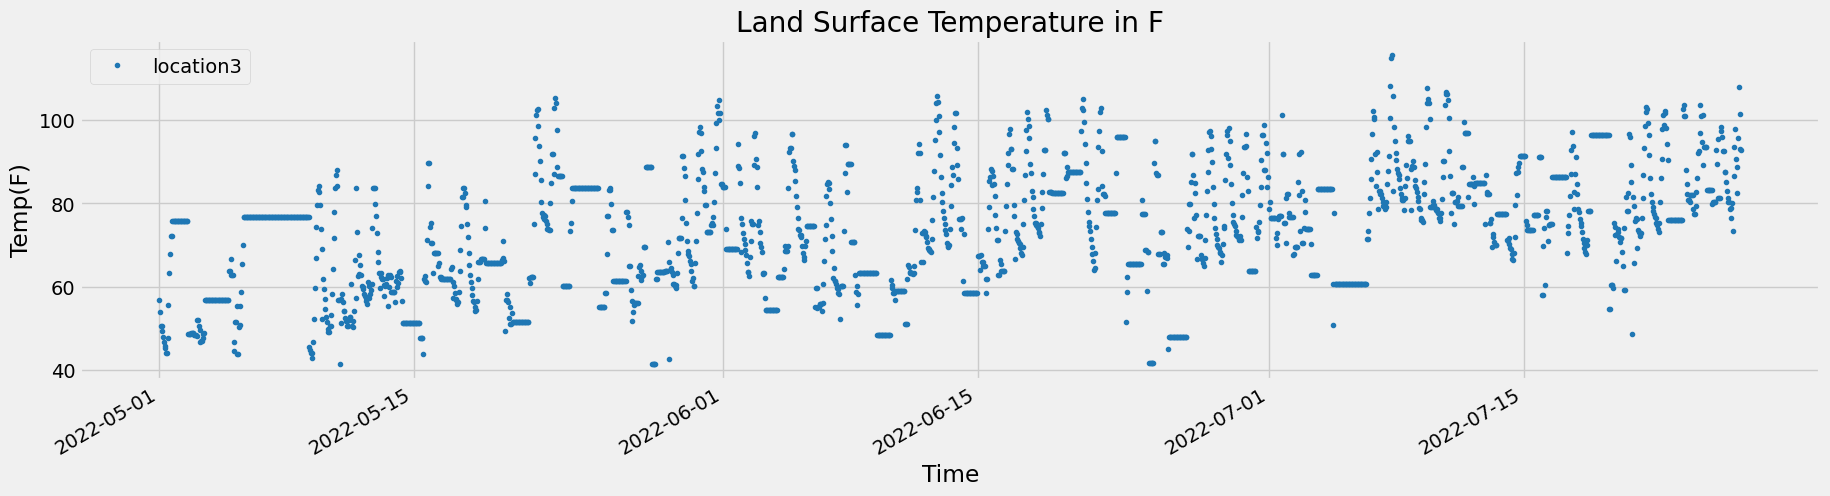

In [7]:
#Plot
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')
#matplotlib plot
i=3 #specify which location to plot
weather.plot(y=(f'location{i}'),
        style='.',
        figsize=(20, 5),
        color=color_pal[0],
        title='Land Surface Temperature in F',
        xlabel='Time',
        ylabel= 'Temp(F)')
plt.legend(loc='upper left')
plt.show()

In [8]:
#creating target column
weather["target"] = weather.shift(-1)[f'location{i}']
weather

,location2,location3,location4,location5,location6,location7,location8,location9,location10,location11,...,location113,location114,location115,location116,location118,location119,location120,location121,location122,target
Time,,,,,,,,,,,,,,,,,,,,,
2022-05-01 00:01:00,57.164,56.732,57.047,58.181,57.236,57.218,57.191,54.626,53.519,57.947,...,53.384,54.680,55.004,55.040,51.332,52.169,52.070,51.980,53.978,53.906
2022-05-01 01:01:00,55.058,53.906,54.086,55.769,54.455,54.473,54.212,52.097,51.971,56.327,...,45.419,54.680,55.004,46.427,49.928,51.584,49.775,51.980,50.702,50.567
2022-05-01 02:01:00,51.485,50.567,51.458,52.430,51.062,52.007,51.836,49.946,50.279,53.015,...,48.299,49.487,50.423,50.927,50.288,50.531,50.657,51.566,50.441,50.513
2022-05-01 03:01:00,52.196,50.513,50.720,53.069,51.755,51.593,51.242,49.649,50.513,53.951,...,46.922,47.516,48.911,49.406,50.099,48.551,49.154,50.180,49.721,49.235
2022-05-01 04:01:00,51.521,49.235,49.739,52.043,50.675,50.513,50.045,48.875,50.027,52.916,...,45.635,46.202,47.435,48.191,49.910,47.264,47.642,48.992,49.406,47.813
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-26 19:01:00,94.217,95.585,85.469,90.689,89.537,69.494,103.370,70.781,78.224,78.980,...,90.788,86.477,83.921,103.901,88.331,77.684,74.993,83.084,96.782,107.933
2022-07-26 20:01:00,96.476,107.933,81.914,100.526,104.702,86.999,66.137,69.179,72.968,101.570,...,90.788,60.386,61.790,63.905,85.262,77.684,74.993,67.523,92.390,101.381
2022-07-26 21:01:00,97.232,101.381,97.358,92.948,96.593,92.471,93.425,85.721,84.218,89.087,...,77.774,87.638,89.726,86.747,85.262,92.399,74.993,67.523,92.390,93.119


In [9]:
weather = weather.ffill()
weather

,location2,location3,location4,location5,location6,location7,location8,location9,location10,location11,...,location113,location114,location115,location116,location118,location119,location120,location121,location122,target
Time,,,,,,,,,,,,,,,,,,,,,
2022-05-01 00:01:00,57.164,56.732,57.047,58.181,57.236,57.218,57.191,54.626,53.519,57.947,...,53.384,54.680,55.004,55.040,51.332,52.169,52.070,51.980,53.978,53.906
2022-05-01 01:01:00,55.058,53.906,54.086,55.769,54.455,54.473,54.212,52.097,51.971,56.327,...,45.419,54.680,55.004,46.427,49.928,51.584,49.775,51.980,50.702,50.567
2022-05-01 02:01:00,51.485,50.567,51.458,52.430,51.062,52.007,51.836,49.946,50.279,53.015,...,48.299,49.487,50.423,50.927,50.288,50.531,50.657,51.566,50.441,50.513
2022-05-01 03:01:00,52.196,50.513,50.720,53.069,51.755,51.593,51.242,49.649,50.513,53.951,...,46.922,47.516,48.911,49.406,50.099,48.551,49.154,50.180,49.721,49.235
2022-05-01 04:01:00,51.521,49.235,49.739,52.043,50.675,50.513,50.045,48.875,50.027,52.916,...,45.635,46.202,47.435,48.191,49.910,47.264,47.642,48.992,49.406,47.813
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-26 19:01:00,94.217,95.585,85.469,90.689,89.537,69.494,103.370,70.781,78.224,78.980,...,90.788,86.477,83.921,103.901,88.331,77.684,74.993,83.084,96.782,107.933
2022-07-26 20:01:00,96.476,107.933,81.914,100.526,104.702,86.999,66.137,69.179,72.968,101.570,...,90.788,60.386,61.790,63.905,85.262,77.684,74.993,67.523,92.390,101.381
2022-07-26 21:01:00,97.232,101.381,97.358,92.948,96.593,92.471,93.425,85.721,84.218,89.087,...,77.774,87.638,89.726,86.747,85.262,92.399,74.993,67.523,92.390,93.119


In [10]:
from sklearn.linear_model import Ridge

rr = Ridge(alpha=.1)

In [11]:
predictors = weather.columns[weather.columns.isin([f'location{i}'])]

In [12]:
predictors

Index(['location3'], dtype='object')

In [13]:
def backtest(weather, model, predictors, start=400, step=5): #start is how much data we want to take before making predictions
    all_predictions = []
    
    for i in range(start, weather.shape[0], step):
        train = weather.iloc[:i,:]
        test = weather.iloc[i:(i+step),:] 
        
        model.fit(train[predictors], train["target"]) 
        
        preds = model.predict(test[predictors])
        preds = pd.Series(preds, index=test.index)
        combined = pd.concat([test["target"], preds], axis=1)
        combined.columns = ["actual", "prediction"]
        combined["diff"] = (combined["prediction"] - combined["actual"]).abs()
        
        all_predictions.append(combined)
    return pd.concat(all_predictions)

In [14]:
predictions = backtest(weather, rr, predictors)

In [15]:
predictions

,actual,prediction,diff
Time,,,
2022-05-17 16:01:00,83.723,80.123101,3.599899
2022-05-17 17:01:00,83.723,82.270596,1.452404
2022-05-17 18:01:00,82.454,82.270596,0.183404
2022-05-17 19:01:00,79.547,81.096965,1.549965
2022-05-17 20:01:00,79.178,78.408434,0.769566
...,...,...,...
2022-07-26 19:01:00,107.933,93.977676,13.955324
2022-07-26 20:01:00,101.381,105.430918,4.049918
2022-07-26 21:01:00,93.119,99.376275,6.257275


In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mean_absolute_error(predictions["actual"], predictions["prediction"]) #the avg of the difference

2.9372569553956587

In [17]:
predictions.sort_values("diff", ascending=False)

,actual,prediction,diff
Time,,,
2022-06-24 15:01:00,89.609,43.298845,46.310155
2022-05-28 01:01:00,41.387,87.206604,45.819604
2022-06-23 02:01:00,51.440,94.370675,42.930675
2022-07-19 16:01:00,54.527,94.892823,40.365823
2022-07-20 22:01:00,48.695,84.190985,35.495985
...,...,...,...
2022-06-25 07:01:00,67.208,67.198703,0.009297
2022-06-21 09:01:00,64.382,64.375100,0.006900
2022-07-02 20:01:00,70.403,70.398053,0.004947


In [18]:
predictions["diff"].round().value_counts().sort_index()

diff
0.0     404
1.0     590
2.0     189
3.0      78
4.0      85
5.0      56
6.0      62
7.0      51
8.0      34
9.0      28
10.0     20
11.0      8
12.0      8
13.0     11
14.0     10
15.0     14
16.0      6
17.0      5
18.0      2
19.0      6
20.0      1
21.0      2
22.0      1
23.0      1
25.0      4
27.0      2
28.0      2
31.0      1
32.0      2
35.0      1
40.0      1
43.0      1
46.0      2
Name: count, dtype: int64

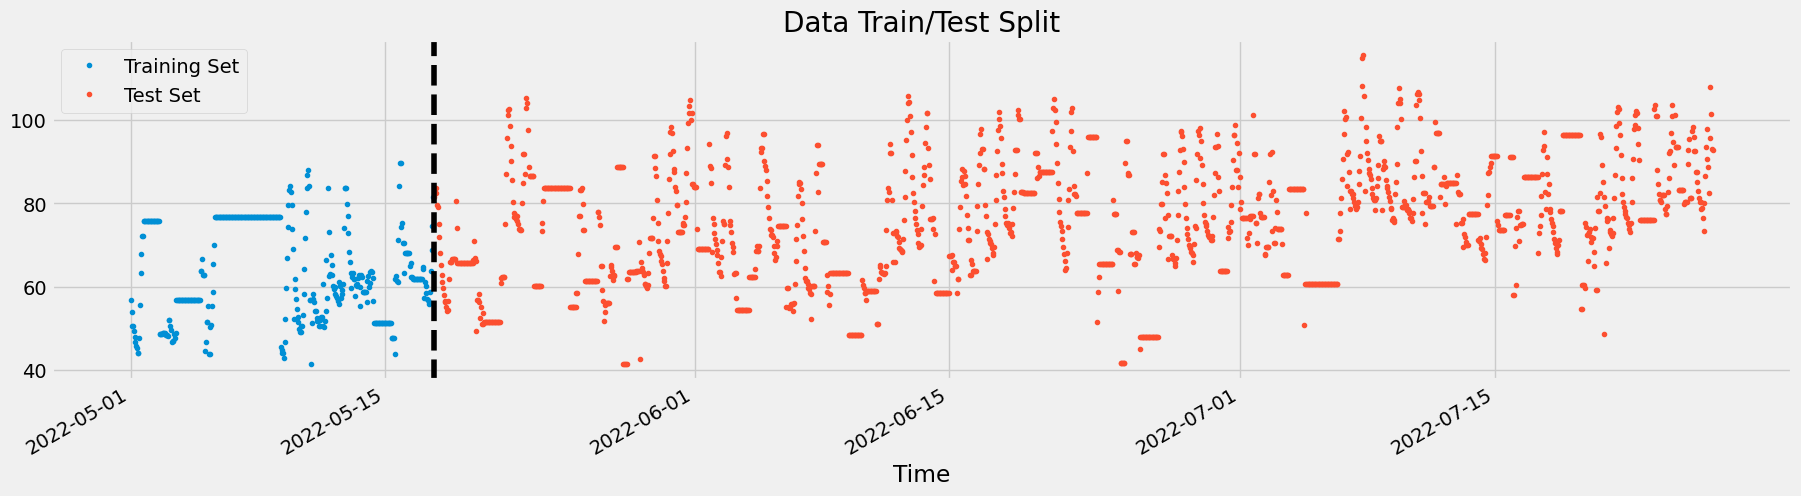

In [19]:
train = weather.loc[weather.index < '2022-05-17 16:01:00']
test = weather.loc[weather.index >= '2022-05-17 16:01:00']

fig, ax = plt.subplots(figsize=(20, 5))
train.plot(ax=ax, style='.',y=(f'location{i}'), label='Training Set', title='Data Train/Test Split')
test.plot(ax=ax, style='.',y=(f'location{i}'), label='Test Set')
ax.axvline('2022-05-17 16:01:00', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()

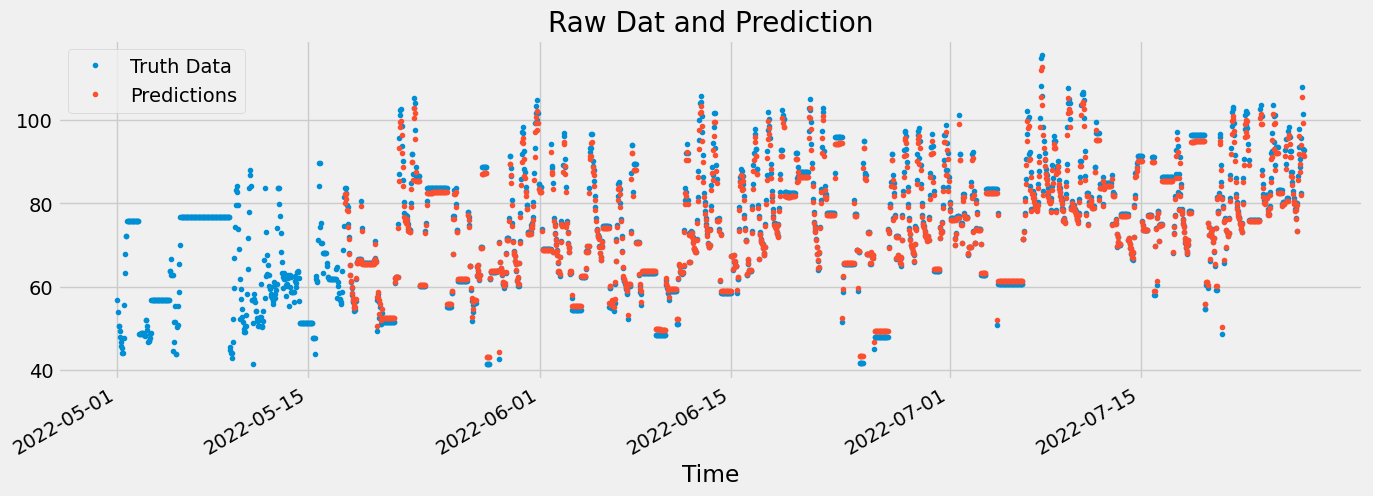

In [20]:
#comparing test and predictions
ax = weather[[f'location{i}']].plot(figsize=(15, 5),style='.')
# weather = weather.merge(test[['predictions']], how='left', left_index=True, right_index=True)
predictions['prediction'].plot(ax=ax, style='.')
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Raw Dat and Prediction')
plt.show()

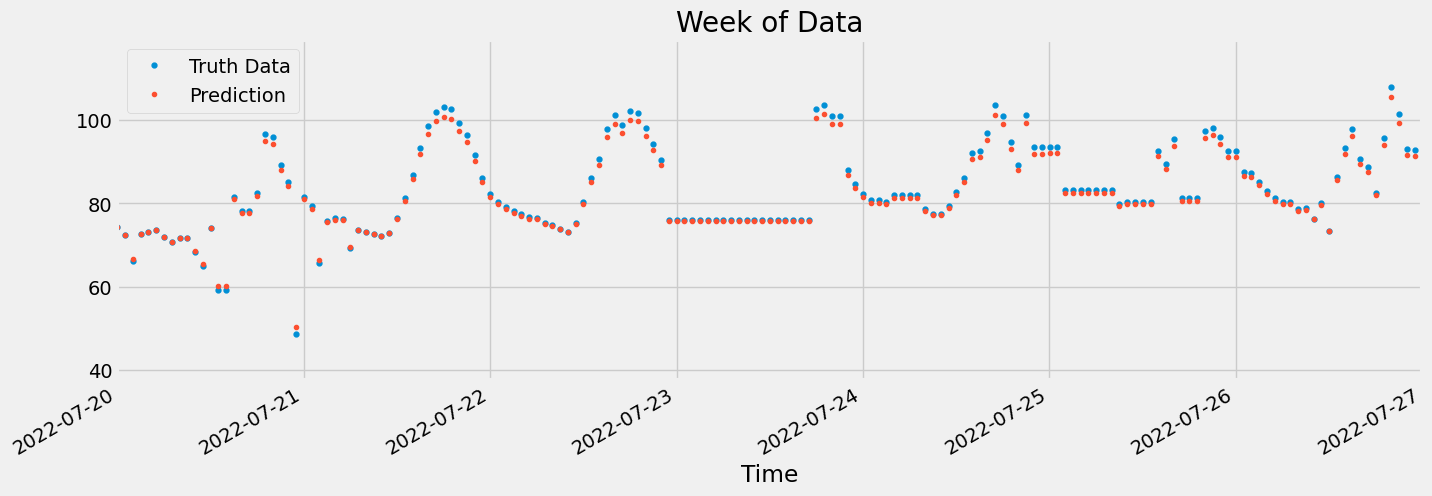

In [21]:
# #Week of Data
#ax = weather.loc[(weather.index > '2022-07-19 23:01:00') & (weather.index < '2022-07-26 23:01:00')][f'location{i}'] \
     #.plot(figsize=(15, 5), title='Week Of Data', style='.')
#weather.loc[(weather.index > '2022-07-19 23:01:00') & (weather.index < '2022-07-26 23:01:00')]['prediction'] \
    #.plot(style='.')
import datetime
ax = weather[[f'location{i}']].plot(figsize=(15, 5),style='o', markersize=3.5)
predictions['prediction'].plot(ax=ax, style='.' ,x=(weather.index > '2022-07-19 23:01:00') & (weather.index < '2022-07-26 23:01:00') )
ax.set_xlim([datetime.date(2022, 7, 20), datetime.date(2022, 7, 27)])
plt.legend(['Truth Data','Prediction'])
ax.set_title('Week of Data')
plt.show()

In [ ]:
#future prediction needs to be added. Is it 